In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv('/kaggle/input/obesidade-dataset/ObesityDataSet_raw_and_data_sinthetic.csv')


# Rápida visualisação da base de dados

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


 # Traduzindo os nomes das colunas para português

In [4]:
new_column_names = {
    'Gender': 'Gênero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history_with_overweight': 'Histórico_familiar_de_sobrepeso',
    'FAVC': 'Consumo_alimentos_calóricos',
    'FCVC': 'Frequência_consumo_vegetais',
    'NCP': 'Número_refeições_principais',
    'CAEC': 'Consumo_entre_refeições',
    'SMOKE': 'Fuma',
    'CH2O': 'Consumo_água',
    'SCC': 'Monitoramento_calorias',
    'FAF': 'Frequência_atividade_física',
    'TUE': 'Tempo_usando_tecnologia',
    'CALC': 'Consumo_álcool',
    'MTRANS': 'Transporte_utilizado',
    'NObeyesdad': 'Nível_de_obesidade'
}
df.rename(columns=new_column_names, inplace=True)

# Colunas traduzidas

In [5]:
df

,Gênero,Idade,Altura,Peso,Histórico_familiar_de_sobrepeso,Consumo_alimentos_calóricos,Frequência_consumo_vegetais,Número_refeições_principais,Consumo_entre_refeições,Fuma,Consumo_água,Monitoramento_calorias,Frequência_atividade_física,Tempo_usando_tecnologia,Consumo_álcool,Transporte_utilizado,Nível_de_obesidade
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Observando os tipos de dados de cada coluna

In [6]:
df.dtypes

Gênero                              object
Idade                              float64
Altura                             float64
Peso                               float64
Histórico_familiar_de_sobrepeso     object
Consumo_alimentos_calóricos         object
Frequência_consumo_vegetais        float64
Número_refeições_principais        float64
Consumo_entre_refeições             object
Fuma                                object
Consumo_água                       float64
Monitoramento_calorias              object
Frequência_atividade_física        float64
Tempo_usando_tecnologia            float64
Consumo_álcool                      object
Transporte_utilizado                object
Nível_de_obesidade                  object
dtype: object

# Proporção de pessoas com histórico familiar de obesidade

In [7]:
qtd_total_hist,_ =df.shape
com_hist,_ =df[df['Histórico_familiar_de_sobrepeso'] =='yes'].shape
sem_hist,_ =df[df['Histórico_familiar_de_sobrepeso'] =='no'].shape

print(f'a proporção de pessoas com histórico é: {round(100* com_hist/qtd_total_hist,2)} %')
print(f'a proporção de pessoas sem histórico é: {round(100* sem_hist/qtd_total_hist,2)} %')

a proporção de pessoas com histórico é: 81.76 %
a proporção de pessoas sem histórico é: 18.24 %


# Quantidade de homens e de mulheres nessa base de dados

In [8]:
df['Gênero'].value_counts()

Gênero
Male      1068
Female    1043
Name: count, dtype: int64

# Gráfico mostrando o consumo de alimentos calóricos das pessoas presentes na base

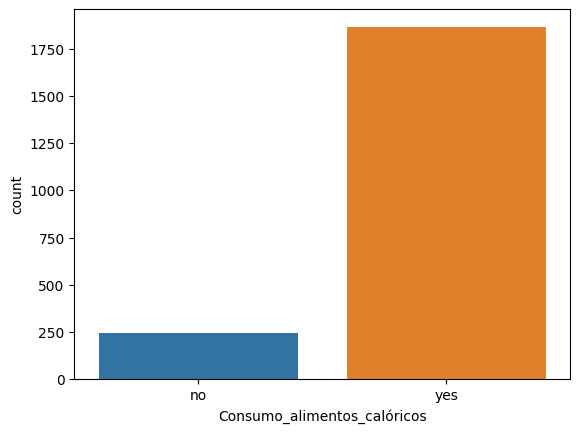

In [9]:
sns.countplot(x='Consumo_alimentos_calóricos', data=df)

plt.show()

# Vamos ver se o consumo de alimentos caloricos influencia na obesidade

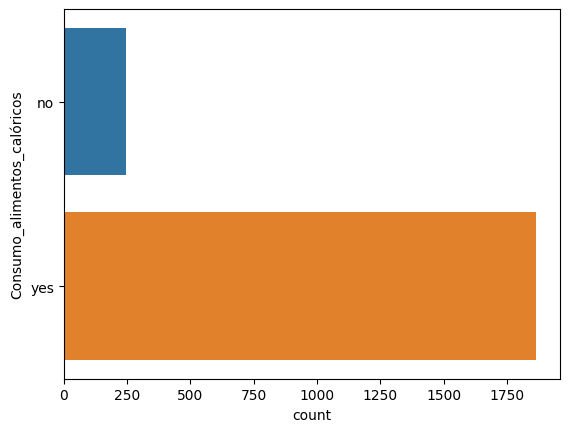

In [10]:
sns.countplot(data=df, y='Consumo_alimentos_calóricos')

plt.show()

Como esperado, a resposa é sim. O consumo de alimentos caloricos influencia na obesidade.

# Vamos analisar se o tabagismo influencia na obesidade

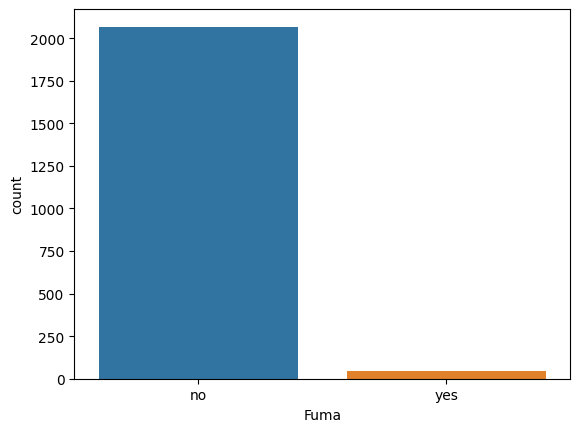

In [11]:
sns.countplot(data=df, x='Fuma')
plt.show()

# O tabagismo não influencia na obesidade

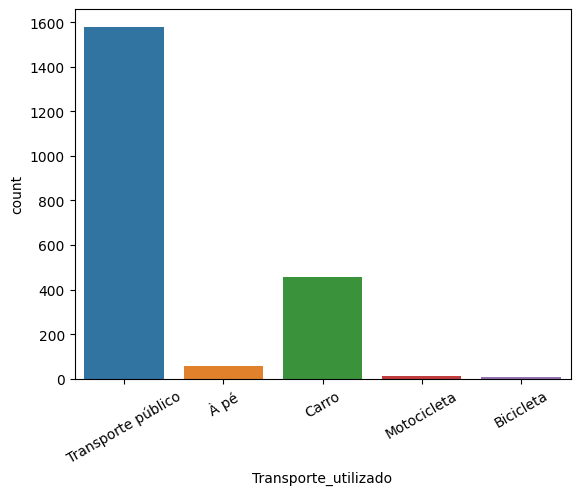

In [12]:
ax=sns.countplot(data=df, x='Transporte_utilizado')
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_xticklabels(['Transporte público','À pé','Carro','Motocicleta','Bicicleta'])
plt.show()

# Vamos analisar se há relação entra o nível de obesidade e o histórici familiar de sobrepeso.

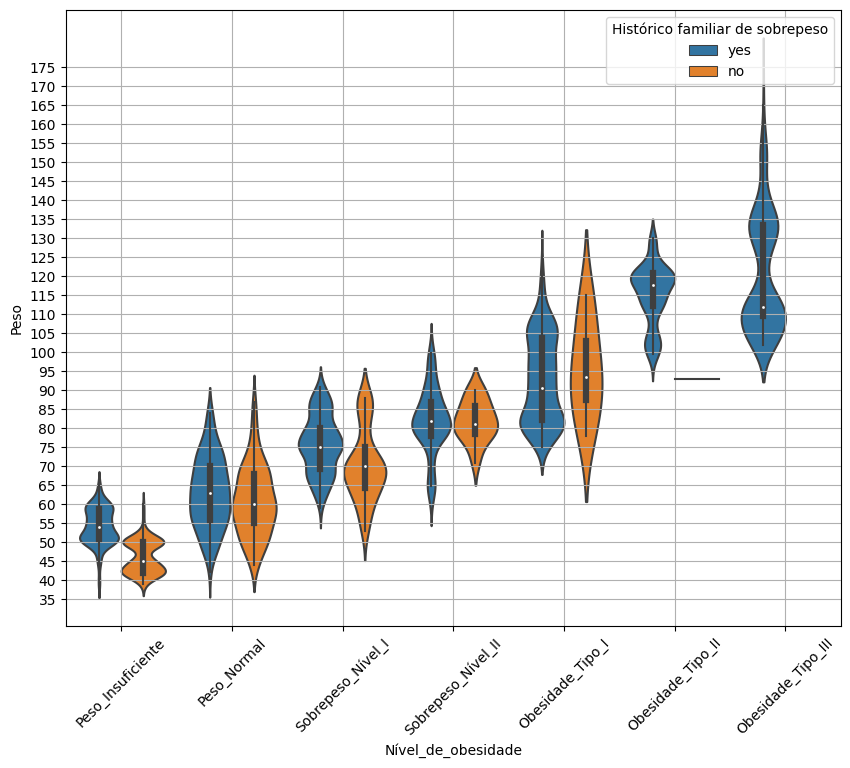

In [13]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Nível_de_obesidade', y='Peso', hue='Histórico_familiar_de_sobrepeso', data=df,order=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III'])
plt.grid(True)
#plt.xticks(rotation=45)
plt.legend(title='Histórico familiar de sobrepeso')
niveis_pt = ['Peso_Insuficiente', 'Peso_Normal', 'Sobrepeso_Nível_I', 'Sobrepeso_Nível_II', 'Obesidade_Tipo_I', 'Obesidade_Tipo_II', 'Obesidade_Tipo_III']
intervalo= range(35,180,5)
plt.yticks(intervalo)
plt.xticks(ticks=range(len(niveis_pt)), labels=niveis_pt, rotation=45)

plt.show()


* todas as pessoas com obesidade nivel 3, e a grande maioria com  nivel 2 tem histórico de obesidade na familia.
* pessoas abaixo de peso saudável tembem podem ter histórico de obesidade na familia.

# Vamos analisar se há relação entra o nível de obesidade e o consummo de àgua.

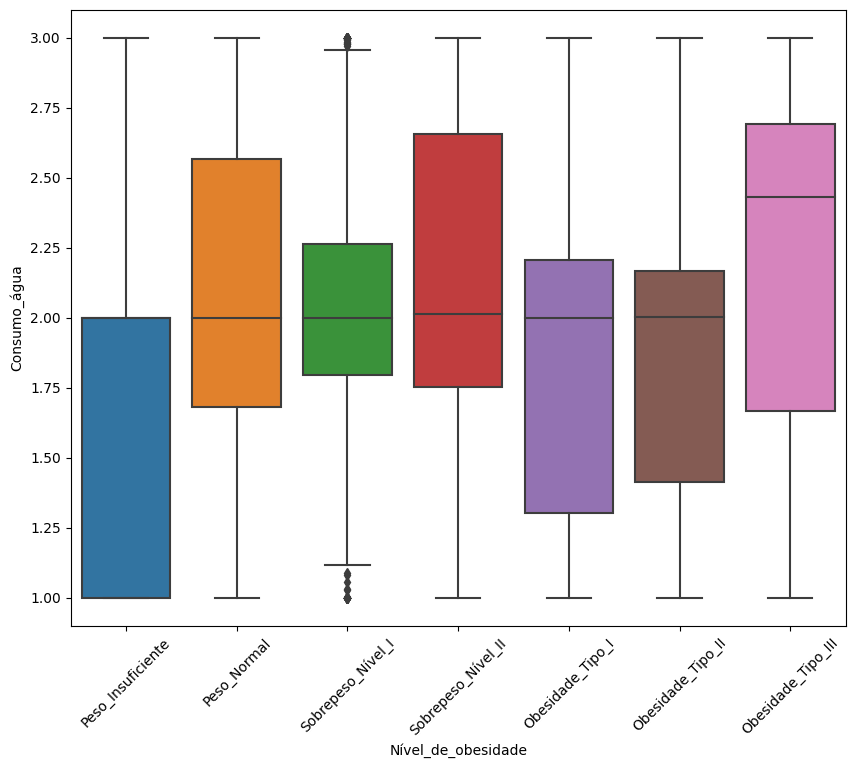

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Nível_de_obesidade', y='Consumo_água', data=df)
plt.xticks(rotation=45)
niveis_pt = ['Peso_Insuficiente', 'Peso_Normal', 'Sobrepeso_Nível_I', 'Sobrepeso_Nível_II', 'Obesidade_Tipo_I', 'Obesidade_Tipo_II', 'Obesidade_Tipo_III']
plt.xticks(ticks=range(len(niveis_pt)),labels=niveis_pt)

plt.show()

Não há relação etre o consumo de agua e a obesidade, mas há de se observar que pessoas com peso normal consomem menos agua, porém, as pessoas com peso insufucuente consomem água em quantidade parecida com os obesos.

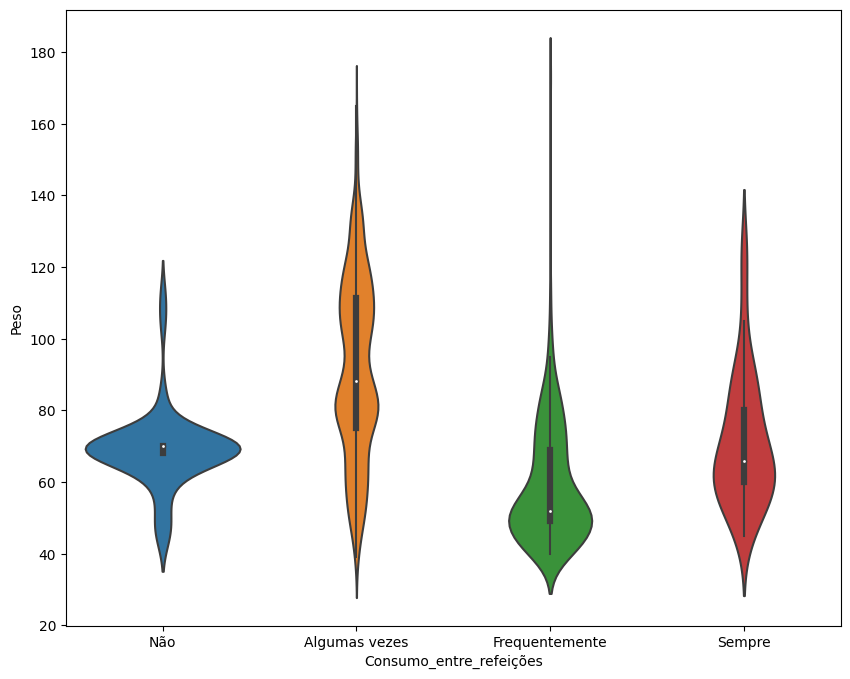

In [15]:
plt.figure(figsize=(10,8))
sns.violinplot(x='Consumo_entre_refeições',y='Peso', data=df,order=['no','Sometimes','Frequently','Always'])
xtickss=['Não','Algumas vezes','Frequentemente','Sempre']
plt.xticks(ticks=range(len(xtickss)),labels=xtickss)

plt.show()

Nesta base de dados não há relação entre a obesidade e o consumo de alimentos entre as refeições.

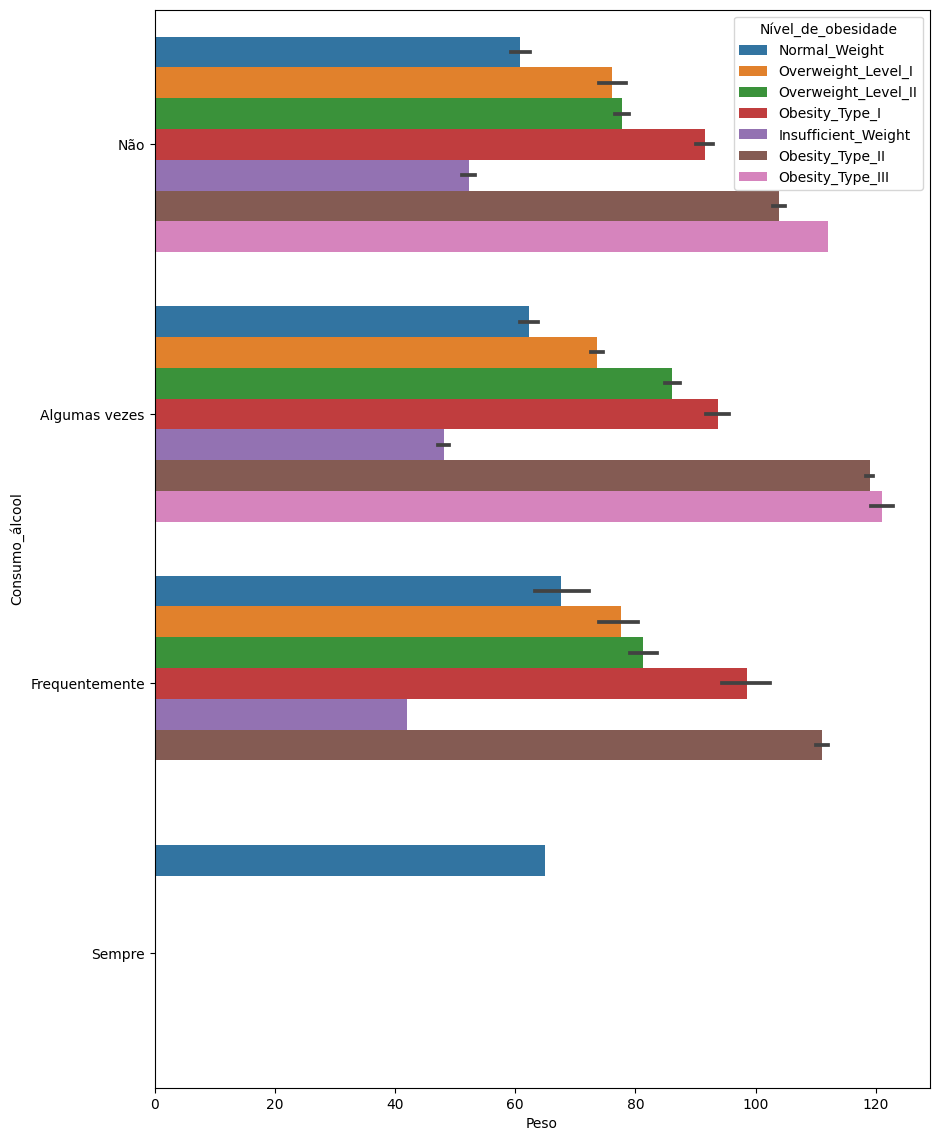

In [16]:
plt.figure(figsize=(10,14))

sns.barplot(x='Peso',y='Consumo_álcool',hue='Nível_de_obesidade',data=df,)

yt_tradu=['Não','Algumas vezes','Frequentemente','Sempre']
plt.yticks(ticks=range(len(yt_tradu)),labels=yt_tradu)


plt.show()

#precisa arrumar esse grafico

# não há relação entre o consumo de alcool e a obesidade

Não há relação entre o consumo de alcool e a obesidade

## Vamos ver a quantidade de pessoas por nível de obesidade nessa base.

In [17]:
hm=df[df['Gênero']=='Male']
nivel_de_obesidade_homens=hm['Nível_de_obesidade'].value_counts()
traducao={'Obesity_Type_II': 'Obesidade_Tipo_II',
    'Obesity_Type_I': 'Obesidade_Tipo_I',
    'Overweight_Level_II': 'Sobrepeso_Nível_II',
    'Normal_Weight': 'Peso_Normal',
    'Overweight_Level_I': 'Sobrepeso_Nível_I',
    'Insufficient_Weight': 'Peso_Insuficiente',
    'Obesity_Type_III': 'Obesidade_Tipo_III'}

nivel_de_obesidade_homens.index=nivel_de_obesidade_homens.index.map(traducao)
nova_ordem=[    'Obesidade_Tipo_III',
    'Obesidade_Tipo_II',
    'Obesidade_Tipo_I',
    'Sobrepeso_Nível_II',
    'Sobrepeso_Nível_I',
    'Peso_Normal',
    'Peso_Insuficiente']
nivel_de_obesidade_homens=nivel_de_obesidade_homens.reindex(nova_ordem)
nivel_de_obesidade_homens=pd.DataFrame(nivel_de_obesidade_homens)
nivel_de_obesidade_homens.rename(columns={'count':'Contagem de Homens'},inplace=True)


ml=df[df['Gênero']== 'Female']
nivel_de_obesidade_mulheres=ml['Nível_de_obesidade'].value_counts()
traducao={'Obesity_Type_II': 'Obesidade_Tipo_II',
    'Obesity_Type_I': 'Obesidade_Tipo_I',
    'Overweight_Level_II': 'Sobrepeso_Nível_II',
    'Normal_Weight': 'Peso_Normal',
    'Overweight_Level_I': 'Sobrepeso_Nível_I',
    'Insufficient_Weight': 'Peso_Insuficiente',
    'Obesity_Type_III': 'Obesidade_Tipo_III'}
nivel_de_obesidade_mulheres.index=nivel_de_obesidade_mulheres.index.map(traducao)
nova_ordem=[    'Obesidade_Tipo_III',
    'Obesidade_Tipo_II',
    'Obesidade_Tipo_I',
    'Sobrepeso_Nível_II',
    'Sobrepeso_Nível_I',
    'Peso_Normal',
    'Peso_Insuficiente']
nivel_de_obesidade_mulheres=nivel_de_obesidade_mulheres.reindex(nova_ordem)
nivel_de_obesidade_mulheres=pd.DataFrame(nivel_de_obesidade_mulheres)
nivel_de_obesidade_mulheres.rename(columns={'count':'Contagem de Mulheres'},inplace=True)
nivel_de_obesidade_mulheres
quantidade_total=pd.merge(nivel_de_obesidade_homens,nivel_de_obesidade_mulheres,on="Nível_de_obesidade", how="inner")
quantidade_total.rename(columns={'proportion_x':'Porcentagem de Homens','proportion_y':'Porcentagem de Mulheres'},inplace=True)
quantidade_total

,Contagem de Homens,Contagem de Mulheres
Nível_de_obesidade,,
Obesidade_Tipo_III,1,323
Obesidade_Tipo_II,295,2
Obesidade_Tipo_I,195,156
Sobrepeso_Nível_II,187,103
Sobrepeso_Nível_I,145,145
Peso_Normal,146,141
Peso_Insuficiente,99,173


## Vamos ver o percentual de obesos por sexo.

In [18]:
hm=df[df['Gênero']=='Male']
ml=df[df['Gênero']== 'Female']


homens_obs=hm['Nível_de_obesidade'].value_counts(normalize=True)*100
mulheres_obs=ml['Nível_de_obesidade'].value_counts(normalize=True)*100
traducao={'Obesity_Type_II': 'Obesidade_Tipo_II',
    'Obesity_Type_I': 'Obesidade_Tipo_I',
    'Overweight_Level_II': 'Sobrepeso_Nível_II',
    'Normal_Weight': 'Peso_Normal',
    'Overweight_Level_I': 'Sobrepeso_Nível_I',
    'Insufficient_Weight': 'Peso_Insuficiente',
    'Obesity_Type_III': 'Obesidade_Tipo_III'}


homens_obs.index=homens_obs.index.map(traducao)
mulheres_obs.index=mulheres_obs.index.map(traducao)


nova_ordem=['Obesidade_Tipo_III',
    'Obesidade_Tipo_II',
    'Obesidade_Tipo_I',
    'Sobrepeso_Nível_II',
    'Sobrepeso_Nível_I',
    'Peso_Normal',
    'Peso_Insuficiente']
homens_obs = homens_obs.reindex(nova_ordem, fill_value=0).round()
mulheres_obs = mulheres_obs.reindex(nova_ordem, fill_value=0).round()


homens_obs=pd.DataFrame(homens_obs)
mulheres_obs=pd.DataFrame(mulheres_obs)
porcentagem_de_obesos=pd.merge(homens_obs,mulheres_obs, on="Nível_de_obesidade", how="inner")
porcentagem_de_obesos.rename(columns={'proportion_x':'Porcentagem de Homens','proportion_y':'Porcentagem de Mulheres'},inplace=True)

porcentagem_de_obesos

,Porcentagem de Homens,Porcentagem de Mulheres
Nível_de_obesidade,,
Obesidade_Tipo_III,0.0,31.0
Obesidade_Tipo_II,28.0,0.0
Obesidade_Tipo_I,18.0,15.0
Sobrepeso_Nível_II,18.0,10.0
Sobrepeso_Nível_I,14.0,14.0
Peso_Normal,14.0,14.0
Peso_Insuficiente,9.0,17.0


## Vamos ver a quantidade de pessoas obesas e a quantidade de pessoas com sobrepeso.

In [19]:
total_de_pessoas_obesas=df[df['Nível_de_obesidade'].isin(['Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])].shape[0]
total_de_pessoas_obesas

total_de_pessoas_com_sobrepeso=df[df['Nível_de_obesidade'].isin(['Overweight_Level_I','Overweight_Level_II'])].shape[0]

print(f'Número de pessoas obesas: {total_de_pessoas_obesas}')
print(f'Número de pessoas com sobrepeso: {total_de_pessoas_com_sobrepeso}')

Número de pessoas obesas: 972
Número de pessoas com sobrepeso: 580


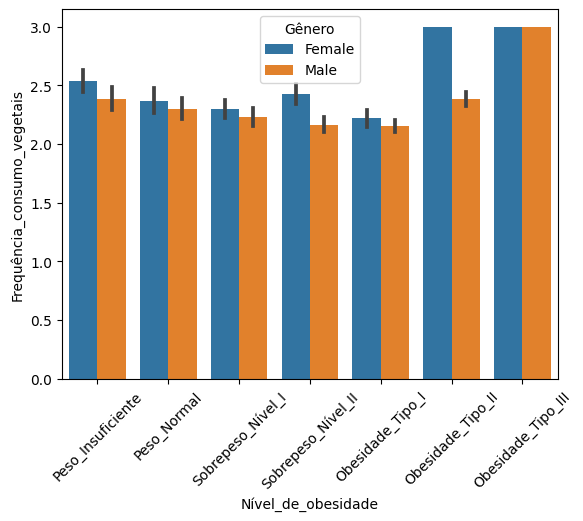

In [20]:
#plt.figure(figsize=(12,10))
sns.barplot(x='Nível_de_obesidade',y='Frequência_consumo_vegetais',hue='Gênero',data=df,order=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II','Obesity_Type_I', 'Obesity_Type_II','Obesity_Type_III']) 
niveis_pt = ['Peso_Insuficiente', 'Peso_Normal', 'Sobrepeso_Nível_I', 'Sobrepeso_Nível_II', 'Obesidade_Tipo_I', 'Obesidade_Tipo_II', 'Obesidade_Tipo_III']
plt.xticks(ticks=range(len(niveis_pt)),labels=niveis_pt)
plt.xticks(rotation=45)
plt.show()


Nessa base de dados a frequência de vegetais não influencia no peso. Muito embora as pessoas com obesidade niveis 1 e 2 consumam mais vegetais em relação às outras pessoas, essa diferença é insignificante.

## Conclusão Geral
A análise aponta para uma alta prevalência de histórico familiar de obesidade e destaca a influência do consumo de alimentos calóricos na obesidade. Fatores como tabagismo, consumo de água e consumo de álcool não mostram uma relação significativa com a obesidade. A distribuição de níveis de obesidade varia entre homens e mulheres, e a frequência de consumo de vegetais não parece impactar significativamente o peso dos indivíduos na base de dados.